# Compute PI

## Set up useful functions

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
from typing import List, Callable
from time import time_ns
from tqdm import tqdm
import numpy as np
import random

In [82]:
SEED = 42
STEPS = [100, 10000, 100000, 10000000]
NB_REPEAT = 10

In [52]:
def benchmark(func: Callable[[int], int], steps: List[int], nb_repeat: int = 1) -> np.ndarray:
    times = np.zeros((len(steps), nb_repeat))

    for i, step in enumerate(tqdm(steps)):
        for j in range(nb_repeat):
            t0 = time_ns()
            func(step, SEED)
            times[i, j] = time_ns() - t0

    return times


In [53]:
def compute_metrics(times: np.ndarray) -> np.ndarray:
    # Function to compute the mean, standard deviation and median of the times
    metrics = np.zeros((times.shape[0], 3))

    for i in range(times.shape[0]):
        metrics[i, 0] = np.mean(times[i])
        metrics[i, 1] = np.std(times[i])
        metrics[i, 2] = np.median(times[i])

    return metrics


In [54]:
# Datastructure to store the functions, their names, the steps and the results
compute_pi_df = pd.DataFrame(columns=['name', 'function', 'steps', 'times', 'metrics'])

C:\Users\cleme\AppData\Local\Temp\ipykernel_2156\731872245.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


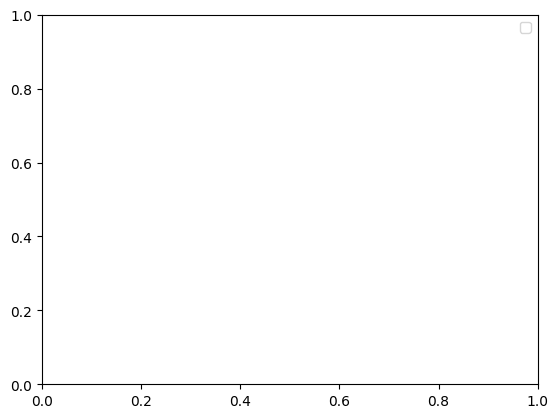

In [55]:
# Benchmark and plot code
for i, row in compute_pi_df.iterrows():
    print(f"Benchmarking {row['name']} method")
    row['times'] = benchmark(row['function'], row['steps'], nb_repeat=1)
    row['metrics'] = compute_metrics(row['times'])

for i, row in compute_pi_df.iterrows():
    plt.plot(row['steps'], row['times'], label=row['name'])
plt.legend()

## Naive python implementation

In [56]:
def compute_pi_integral(num_trial, _ = None):
    step = 1.0 / num_trial
    sum = 0.0
    for j in range(num_trial):
        x = (j - 0.5) * step
        sum += 4.0 / (1.0 + x * x)
    return step * sum

def compute_pi_metropolis(num_trial, seed):
    counter = 0.0
    random.seed(seed)

    for _ in range(num_trial):
        x_val = random.random()
        y_val = random.random()

        radius = x_val ** 2 + y_val ** 2
        if radius < 1.0:
            counter += 1.0

    return 4.0 * counter / num_trial


In [57]:
compute_pi_df.loc[0] = {
    'name': 'Integral',
    'function': compute_pi_integral,
    'steps': STEPS,
    'times': None,
    'metrics': None
}

compute_pi_df.loc[1] = {
    'name': 'Metropolis',
    'function': compute_pi_metropolis,
    'steps': STEPS,
    'times': None,
    'metrics': None
}

## Generator function implementation

In [58]:
def generator_integral(num_trial, step):
    for j in range(num_trial):
        x = (j - 0.5) * step
        yield 4.0 / (1.0 + x * x)

def compute_pi_integral_gen(num_trial, _ = None):
    step = 1.0 / num_trial
    return sum(generator_integral(num_trial, step)) * step        


def generator_metropolis(num_trial, seed):
    random.seed(seed)

    for _ in range(num_trial):
        x_val = random.random()
        y_val = random.random()

        radius = x_val ** 2 + y_val ** 2
        if radius < 1.0:
            yield 1
        else:
            yield 0

def compute_pi_metropolis_gen(num_trial, seed):
    return 4.0 * sum(generator_metropolis(num_trial, seed)) / num_trial


In [59]:
compute_pi_df.loc[2] = {
    'name': 'Integral Generator',
    'function': compute_pi_integral_gen,
    'steps': STEPS,
    'times': None,
    'metrics': None
}

compute_pi_df.loc[3] = {
    'name': 'Metropolis Generator',
    'function': compute_pi_metropolis_gen,
    'steps': STEPS,
    'times': None,
    'metrics': None
}

## Lambda function implementation

In [60]:
compute_pi_integral_lambda = lambda num_trial, _: sum([4.0 / (1.0 + ((j - 0.5) / num_trial) ** 2) for j in range(num_trial)]) / num_trial
compute_pi_metropolis_lambda = lambda num_trial, _: 4.0 * sum([1 for _ in range(num_trial) if (random.random() ** 2 + random.random() ** 2) < 1.0]) / num_trial
compute_pi_metropolis_lambda_filter = lambda num_trial, _: 4.0 * len(list(filter(lambda _: (random.random() ** 2 + random.random() ** 2) < 1, range(num_trial)))) / num_trial

In [61]:
compute_pi_df.loc[4] = {
    'name': 'Integral Lambda',
    'function': compute_pi_integral_lambda,
    'steps': STEPS,
    'times': None,
    'metrics': None
}

compute_pi_df.loc[5] = {
    'name': 'Metropolis Lambda',
    'function': compute_pi_metropolis_lambda,
    'steps': STEPS,
    'times': None,
    'metrics': None
}

compute_pi_df.loc[6] = {
    'name': 'Metropolis Lambda Filter',
    'function': compute_pi_metropolis_lambda_filter,
    'steps': STEPS,
    'times': None,
    'metrics': None
}

## Function implementation with Numpy

In [62]:
def compute_pi_integral_numpy(num_trial, _ = None):
    step = 1.0 / num_trial
    tot = np.fromfunction(lambda j: 4.0 / (1.0 + ((j - 0.5) * step) ** 2), (num_trial,))
    return step * tot.sum()


def compute_pi_metropolis_numpy(num_trial, seed):
    random.seed(seed)
    vect = np.vectorize(lambda _: random.random() ** 2 + random.random() ** 2)
    tot = vect(np.zeros(num_trial))
    return 4.0 * np.sum(tot < 1.0) / num_trial

# TODO: Faire avec np.random.rand(num_trial) ** 2 + np.random.rand(num_trial) ** 2
# TODO: Faire sans from function mais avec np.arange(num_trial) puis les calculs sur tout le tableau
# TODO: Utiliser le random de numpy

In [63]:
compute_pi_df.loc[7] = {
    'name': 'Integral Numpy',
    'function': compute_pi_integral_numpy,
    'steps': STEPS,
    'times': None,
    'metrics': None
}

compute_pi_df.loc[8] = {
    'name': 'Metropolis Numpy',
    'function': compute_pi_metropolis_numpy,
    'steps': STEPS,
    'times': None,
    'metrics': None
}

## Numba implementation

In [64]:
import numba

@numba.jit(nopython=True)
def pi_integral_numba(num_trial, _ = None):
    step = 1.0/num_trial
    sum = 0
    for j in range(num_trial):
        x = (j - 0.5) * step
        sum = sum + 4.0/(1.0 + x * x)
    return sum * step

@numba.jit(nopython=True)
def pi_metropolis_numba(num_trial, seed):
    counter = 0.0
    random.seed(seed)
    for _ in range(num_trial):
        x_val = random.random()
        y_val = random.random()
        radius = x_val ** 2 + y_val ** 2
        if radius < 1:
            counter += 1
    return 4 * counter/num_trial

In [65]:
compute_pi_df.loc[9] = {
    'name': 'Integral Numba',
    'function': pi_integral_numba,
    'steps': STEPS,
    'times': None,
    'metrics': None
}

compute_pi_df.loc[10] = {
    'name': 'Metropolis Numba',
    'function': pi_metropolis_numba,
    'steps': STEPS,
    'times': None,
    'metrics': None
}

## Pandas implementation

In [66]:
import pandas as pd

def compute_pi_integral_pandas(num_trial, _ = None):
    step = 1.0 / num_trial
    tot = pd.Series(np.arange(num_trial))
    tot = 4.0 / (1.0 + ((tot - 0.5) * step) ** 2)
    return step * tot.sum()

def compute_pi_metropolis_pandas(num_trial, seed):
    random.seed(seed)
    tot = pd.Series(np.zeros(num_trial))
    tot = tot.apply(lambda _: random.random() ** 2 + random.random() ** 2)
    return 4.0 * (tot < 1.0).sum() / num_trial

# TODO: Utiliser vectorize

In [67]:
compute_pi_df.loc[11] = {
    'name': 'Integral Pandas',
    'function': compute_pi_integral_pandas,
    'steps': STEPS,
    'times': None,
    'metrics': None
}

compute_pi_df.loc[12] = {
    'name': 'Metropolis Pandas',
    'function': compute_pi_metropolis_pandas,
    'steps': STEPS,
    'times': None,
    'metrics': None
}

## Dask implementation

In [68]:
import dask.array as da

def compute_pi_integral_dask(num_trial, _ = None):
    step = 1.0 / num_trial
    tot = da.arange(num_trial, chunks='auto')    
    tot = 4.0 / (1.0 + ((tot - 0.5) * step) ** 2)
    result = step * tot.sum()
    return result.compute()

def compute_pi_metropolis_dask(num_trial, seed):
    da.random.seed(seed)
    x_vals = da.random.random(num_trial, chunks='auto')
    y_vals = da.random.random(num_trial, chunks='auto')
    radius = x_vals ** 2 + y_vals ** 2
    result = 4.0 * (radius < 1.0).sum() / num_trial
    return result.compute()

# TODO: Utiliser vectorize

In [69]:
compute_pi_df.loc[13] = {
    'name': 'Integral Dask',
    'function': compute_pi_integral_dask,
    'steps': STEPS,
    'times': None,
    'metrics': None
}

compute_pi_df.loc[14] = {
    'name': 'Metropolis Dask',
    'function': compute_pi_metropolis_dask,
    'steps': STEPS,
    'times': None,
    'metrics': None
}

In [70]:
# Benchmark code
for i, row in compute_pi_df.iterrows():
    print(f"Benchmarking {row['name']} method")
    row['times'] = benchmark(row['function'], row['steps'], nb_repeat=NB_REPEAT)
    row['metrics'] = compute_metrics(row['times'])


Benchmarking Integral method


100%|██████████| 4/4 [00:17<00:00,  4.29s/it]


Benchmarking Metropolis method


100%|██████████| 4/4 [00:44<00:00, 11.19s/it]


Benchmarking Integral Generator method


100%|██████████| 4/4 [00:15<00:00,  3.88s/it]


Benchmarking Metropolis Generator method


100%|██████████| 4/4 [00:44<00:00, 11.02s/it]


Benchmarking Integral Lambda method


100%|██████████| 4/4 [00:28<00:00,  7.08s/it]


Benchmarking Metropolis Lambda method


100%|██████████| 4/4 [00:41<00:00, 10.46s/it]


Benchmarking Metropolis Lambda Filter method


100%|██████████| 4/4 [00:48<00:00, 12.12s/it]


Benchmarking Integral Numpy method


100%|██████████| 4/4 [00:01<00:00,  2.06it/s]


Benchmarking Metropolis Numpy method


100%|██████████| 4/4 [00:48<00:00, 12.06s/it]


Benchmarking Integral Numba method


100%|██████████| 4/4 [00:00<00:00,  6.53it/s]


Benchmarking Metropolis Numba method


100%|██████████| 4/4 [00:01<00:00,  3.49it/s]


Benchmarking Integral Pandas method


100%|██████████| 4/4 [00:01<00:00,  2.39it/s]


Benchmarking Metropolis Pandas method


100%|██████████| 4/4 [00:54<00:00, 13.65s/it]


Benchmarking Integral Dask method


100%|██████████| 4/4 [00:01<00:00,  2.00it/s]


Benchmarking Metropolis Dask method


100%|██████████| 4/4 [00:02<00:00,  1.40it/s]


In [80]:
compute_pi_df.metrics[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.39966000e+06, 4.90625175e+05, 2.00175000e+06],
       [2.22597200e+07, 7.99438949e+05, 2.20003000e+07],
       [1.68960971e+09, 3.58047531e+08, 1.44739525e+09]])

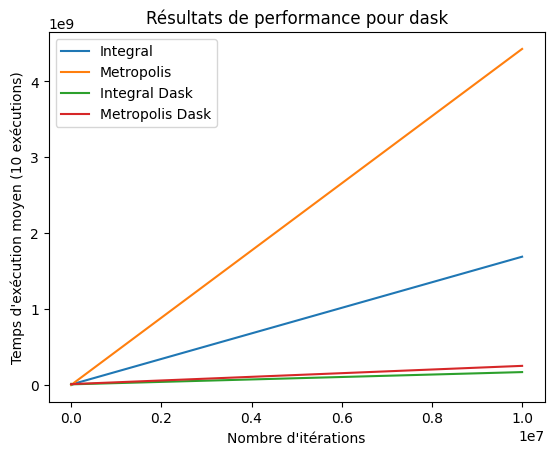

In [98]:
# Plot results
for i, row in compute_pi_df.loc[0:1].iterrows():
    mean = np.zeros((len(STEPS)))
    for j, metrics in enumerate(row['metrics']):
        mean[j] = metrics[0]
    plt.plot(row['steps'], mean, label=row['name'])
# for i, row in compute_pi_df.loc[13:14].iterrows():
#     mean = np.zeros((len(STEPS)))
#     for j, metrics in enumerate(row['metrics']):
#         mean[j] = metrics[0]
#     plt.plot(row['steps'], mean, label=row['name'])
plt.xlabel("Nombre d'itérations")
plt.ylabel(f"Temps d'exécution moyen ({NB_REPEAT} exécutions)")
plt.title('Résultats de performance pour dask')
plt.legend()

In [1]:
# Plot results
for i, row in compute_pi_df.iterrows():
    mean = np.zeros((len(STEPS)))
    for j, metrics in enumerate(row['metrics']):
        mean[j] = metrics[0]
    plt.plot(row['steps'], mean, label=row['name'])
plt.xlabel("Nombre d'itérations")
plt.ylabel(f"Temps d'exécution moyen ({NB_REPEAT} exécutions)")
plt.title('Résultats de performance pour chaque implémentation différente')
plt.legend()

NameError: name 'compute_pi_df' is not defined

## Cython implementation

In [72]:
import cython
%load_ext cython

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


In [73]:
%%cython -a
import random
import numpy as np
from tqdm import tqdm
from time import time_ns
import matplotlib.pyplot as plt

def compute_pi_integral_cy(num_trial):
    cdef double step = 1.0 / num_trial
    cdef double tot = 0.0
    cdef double x = 0.0
    for j in range(int(num_trial)):
        x = (j - 0.5) * step
        tot = tot + 4.0 / (1.0 + x * x)
    return step * tot

def compute_pi_metropolis_cy(num_trial, seed):
    cdef double counter = 0.0
    random.seed(seed)

    for _ in range(int(num_trial)):
        x_val = random.random()
        y_val = random.random()

        radius = x_val ** 2 + y_val ** 2
        if radius < 1.0:
            counter += 1.0

    return 4.0 * counter / num_trial


steps = [100.0, 10000.0, 100000.0, 10000000.0]
times_integral_cython = np.zeros(len(steps))

for i, step in enumerate(tqdm(steps)):
    t0 = time_ns()
    compute_pi_integral_cy(step)
    times_integral_cython[i] = time_ns() - t0

print(times_integral_cython)
np.save('times_integral_cython.npy', times_integral_cython)


steps = [100.0, 10000.0, 100000.0, 10000000.0]
times_metropolis_cython = np.zeros(len(steps))

for i, step in enumerate(tqdm(steps)):
    t0 = time_ns()
    compute_pi_metropolis_cy(step, 10)
    times_metropolis_cython[i] = time_ns() - t0

print(times_metropolis_cython)
np.save('times_metropolis_cython.npy', times_metropolis_cython)

Content of stdout:
_cython_magic_018aeca59cd7e85cf44d5b6c5d2029d9327b3fde.c
C:\Users\cleme\.ipython\cython\_cython_magic_018aeca59cd7e85cf44d5b6c5d2029d9327b3fde.c(7160): warning C4244: '='ÿ: conversion de 'Py_ssize_t' en 'long', perte possible de donnes
   Cration de la bibliothque C:\Users\cleme\.ipython\cython\Users\cleme\.ipython\cython\_cython_magic_018aeca59cd7e85cf44d5b6c5d2029d9327b3fde.cp312-win_amd64.lib et de l'objet C:\Users\cleme\.ipython\cython\Users\cleme\.ipython\cython\_cython_magic_018aeca59cd7e85cf44d5b6c5d2029d9327b3fde.cp312-win_amd64.exp
Gnration de code en cours
Fin de la gnration du code

100%|██████████| 4/4 [00:00<00:00,  7.37it/s]


[0.000000e+00 2.011100e+06 5.005500e+06 5.335015e+08]


100%|██████████| 4/4 [00:03<00:00,  1.02it/s]

[0.0000000e+00 3.9897000e+06 3.6999600e+07 3.8944642e+09]


In [74]:
times_integral = np.load('times_integral.npy')
times_integral_gen = np.load('times_integral_gen.npy')
times_integral_lambda = np.load('times_integral_lambda.npy')
times_integral_numpy = np.load('times_integral_numpy.npy')

times_metropolis = np.load('times_metropolis.npy')
times_metropolis_gen = np.load('times_metropolis_gen.npy')
times_metropolis_lambda = np.load('times_metropolis_lambda.npy')
times_metropolis_numpy = np.load('times_metropolis_numpy.npy')

FileNotFoundError: [Errno 2] No such file or directory: 'times_integral.npy'

In [46]:
plt.plot(steps, times_integral, label='Integral')
plt.plot(steps, times_integral_gen, label='Integral Gen')
plt.plot(steps, times_integral_lambda, label='Integral Lambda')
plt.plot(steps, times_integral_numpy, label='Integral Numpy')
plt.plot(steps, times_integral_cython, label='Integral Cython')

plt.plot(steps, times_metropolis, label='Metropolis')
plt.plot(steps, times_metropolis_gen, label='Metropolis Gen')
plt.plot(steps, times_metropolis_lambda, label='Metropolis Lambda')
plt.plot(steps, times_metropolis_numpy, label='Metropolis Numpy')
plt.plot(steps, times_metropolis_cython, label='Metropolis Cython')

plt.legend()

NameError: name 'times_integral' is not defined